# Spending Insights- Predicting Customer Purchases

## Import the Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Let's Load the datasets
client_info = pd.read_csv('ClientInfo.csv')
client_transactions = pd.read_csv('ClientTransactions.csv')
financial_forecast = pd.read_csv('FinancialForecast.csv')

# Merge datasets into one
final_data = pd.DataFrame(client_info.merge(client_transactions, on='Client_ID').merge(financial_forecast, on='Client_ID'))
final_data

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Client_ID,Account_Category,Sex,Years_of_Age,Earnings,Job_Tenure_Years,Years_with_Bank,Residence_Zone,Uses_OnlineBanking,Average_Transaction_Gap,...,Credit_Txn_May,Max_Credit_May,Debits_June,Credits_June,Debit_Txn_June,Credit_Txn_June,Max_Credit_June,Loan_Inquiry_Recent,Active_EMI_Payment,Future_CC_Spend
0,1,standard,Female,66,Above_Average,23,4,2,0,14,...,9,32671.801454,19448.354899,28090.150684,19,7,44188.089797,No,636.212632,14307.040795
1,2,premium,Female,31,Average,8,22,2,1,24,...,42,25309.303627,38631.681829,21468.278030,20,20,35651.535666,Yes,2867.378244,NaN
2,3,premium,Male,35,Below_Average,13,12,3,1,18,...,10,47099.381368,35342.730917,35453.403105,3,18,35225.590780,Yes,4198.467197,4048.850382
3,4,standard,Female,43,Above_Average,8,13,1,0,17,...,13,29528.547478,26310.574000,20294.708303,4,43,32298.013633,Yes,2081.295468,4635.880423
4,5,standard,Female,38,Average,23,3,4,0,4,...,20,36523.946704,15814.338412,8616.107687,26,41,14928.738971,No,5950.858966,14863.424705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,standard,Male,41,Below_Average,20,18,5,1,16,...,28,31174.060875,1547.872396,23481.179379,35,17,17979.191813,No,2340.215257,13005.083195
496,497,standard,Female,58,Average,29,12,5,0,1,...,20,11715.284357,30976.111435,32485.931275,8,12,25987.780701,No,3255.507698,14277.454235
497,498,standard,Male,21,Below_Average,4,23,2,1,22,...,6,42989.986379,29982.107217,11411.345170,8,22,41513.844463,No,1588.075803,10957.849285
498,499,premium,Female,57,Above_Average,7,14,2,0,2,...,8,40626.226050,1874.641966,34721.863275,42,14,26077.184239,No,6076.135273,5162.068125


## Display the Data

In [2]:
# Display the first few rows of the merged dataset
print(final_data.head())

   Client_ID Account_Category     Sex  Years_of_Age       Earnings  \
0          1         standard  Female            66  Above_Average   
1          2          premium  Female            31        Average   
2          3          premium    Male            35  Below_Average   
3          4         standard  Female            43  Above_Average   
4          5         standard  Female            38        Average   

   Job_Tenure_Years  Years_with_Bank  Residence_Zone  Uses_OnlineBanking  \
0                23                4               2                   0   
1                 8               22               2                   1   
2                13               12               3                   1   
3                 8               13               1                   0   
4                23                3               4                   0   

   Average_Transaction_Gap  ...  Credit_Txn_May  Max_Credit_May   Debits_June  \
0                       14  ...          

## Data Preprocessing

#### DATA CHECKING

In [3]:
# Check data types
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client_ID                500 non-null    int64  
 1   Account_Category         500 non-null    object 
 2   Sex                      500 non-null    object 
 3   Years_of_Age             500 non-null    int64  
 4   Earnings                 500 non-null    object 
 5   Job_Tenure_Years         500 non-null    int64  
 6   Years_with_Bank          500 non-null    int64  
 7   Residence_Zone           500 non-null    int64  
 8   Uses_OnlineBanking       500 non-null    int64  
 9   Average_Transaction_Gap  500 non-null    int64  
 10  CC_spend_April           500 non-null    float64
 11  DC_spend_April           500 non-null    float64
 12  CC_spend_May             500 non-null    float64
 13  DC_spend_May             500 non-null    float64
 14  CC_spend_June            5

In [4]:
# check for missing values
print(final_data.isnull().sum())

Client_ID                   0
Account_Category            0
Sex                         0
Years_of_Age                0
Earnings                    0
Job_Tenure_Years            0
Years_with_Bank             0
Residence_Zone              0
Uses_OnlineBanking          0
Average_Transaction_Gap     0
CC_spend_April              0
DC_spend_April              0
CC_spend_May                0
DC_spend_May                0
CC_spend_June               0
DC_spend_June               0
CC_txn_count_April          0
CC_txn_count_May            0
CC_txn_count_June           0
DC_txn_count_April          0
DC_txn_count_May            0
DC_txn_count_June           0
Max_Card_Limit              0
Has_Personal_Loan           0
Has_Vehicle_Loan            0
Personal_Loan_Closed        0
Vehicle_Loan_Closed         0
Investment_A                0
Investment_B                0
Investment_C                0
Investment_D                0
Debits_April                0
Credits_April               0
Debit_Txn_

## Conversion of Categorical Values-One Hot Encoding

**Generally,we try to avoid using categorical variables directly; instead we convert them into numeric formats using techniques like one-hot encoding or label encoding.**

**We have four columns that are categorical.**

In [5]:
import pandas as pd

# We assume the final_data is our DataFrame
final_data_encoded = pd.get_dummies(final_data, columns=['Account_Category', 'Sex', 'Earnings', 'Loan_Inquiry_Recent'], drop_first=True)

# Now our final_data_encoded is ready for modeling
final_data_encoded

,Client_ID,Years_of_Age,Job_Tenure_Years,Years_with_Bank,Residence_Zone,Uses_OnlineBanking,Average_Transaction_Gap,CC_spend_April,DC_spend_April,CC_spend_May,...,Debit_Txn_June,Credit_Txn_June,Max_Credit_June,Active_EMI_Payment,Future_CC_Spend,Account_Category_standard,Sex_Male,Earnings_Average,Earnings_Below_Average,Loan_Inquiry_Recent_Yes
0,1,66,23,4,2,0,14,4434.237640,4681.872917,8691.681587,...,19,7,44188.089797,636.212632,14307.040795,True,False,False,False,False
1,2,31,8,22,2,1,24,5444.512627,3740.867000,5391.629443,...,20,20,35651.535666,2867.378244,NaN,False,False,True,False,True
2,3,35,13,12,3,1,18,10055.915467,4186.830418,10883.941630,...,3,18,35225.590780,4198.467197,4048.850382,False,True,False,True,True
3,4,43,8,13,1,0,17,1878.747575,1416.917930,5625.613589,...,4,43,32298.013633,2081.295468,4635.880423,True,False,False,False,True
4,5,38,23,3,4,0,4,8951.647245,8867.753934,10863.717832,...,26,41,14928.738971,5950.858966,14863.424705,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,41,20,18,5,1,16,4402.010574,6853.191704,7850.529045,...,35,17,17979.191813,2340.215257,13005.083195,True,True,False,True,False
496,497,58,29,12,5,0,1,6318.214025,5236.272480,1465.519889,...,8,12,25987.780701,3255.507698,14277.454235,True,False,True,False,False
497,498,21,4,23,2,1,22,2362.114576,8656.023154,9574.780082,...,8,22,41513.844463,1588.075803,10957.849285,True,True,False,True,False
498,499,57,7,14,2,0,2,8068.175508,8700.546048,5597.823385,...,42,14,26077.184239,6076.135273,5162.068125,False,False,False,False,False


## Data Correlation Check

In [6]:
# Our data should be a pandas dataframe.
import pandas
corr_data = final_data_encoded
corr_matrix = corr_data.corr()
print(corr_matrix["Future_CC_Spend"].sort_values(ascending=False))

Future_CC_Spend              1.000000
Has_Personal_Loan            0.078201
Vehicle_Loan_Closed          0.070341
Debit_Txn_May                0.067026
Personal_Loan_Closed         0.063929
Max_Card_Limit               0.044157
Has_Vehicle_Loan             0.042194
DC_spend_May                 0.034234
Active_EMI_Payment           0.032210
Credits_May                  0.029650
Debits_May                   0.029373
DC_spend_June                0.027990
Investment_C                 0.027954
CC_spend_April               0.027487
Debit_Txn_June               0.024731
Credits_April                0.018089
Sex_Male                     0.018026
Debit_Txn_April              0.014264
Loan_Inquiry_Recent_Yes      0.011216
Years_with_Bank              0.007528
Debits_April                 0.003813
Debits_June                  0.002942
Client_ID                    0.002832
DC_txn_count_April           0.002356
Earnings_Below_Average       0.002212
Credit_Txn_April             0.001860
Max_Credit_M

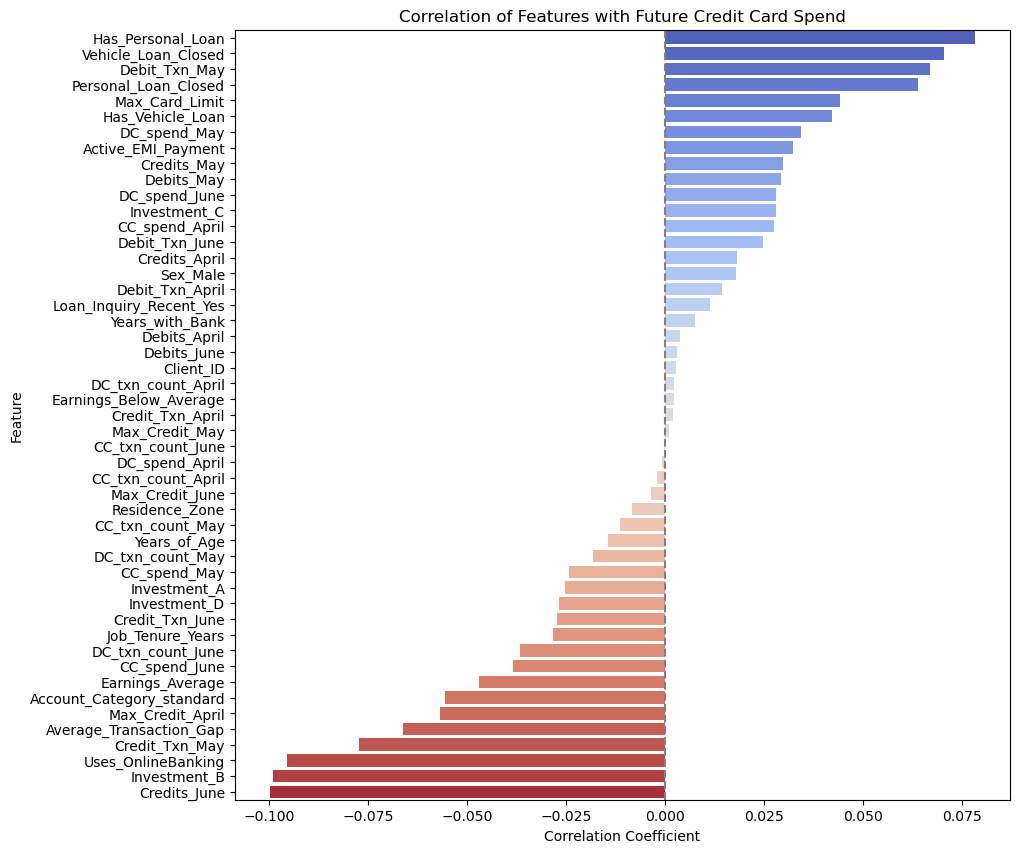

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Here we are assuming final_data is your DataFrame
correlation_matrix = final_data_encoded.corr()

# Getting the correlation values with the target feature 'Future_CC_Spend'
target_correlation = correlation_matrix['Future_CC_Spend'].sort_values(ascending=False)

# Converting to DataFrame for visualization
target_correlation_df = target_correlation.reset_index()
target_correlation_df.columns = ['Feature', 'Correlation']

# Filtering out the target feature itself
target_correlation_df = target_correlation_df[target_correlation_df['Feature'] != 'Future_CC_Spend']

# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x='Correlation', y='Feature', data=target_correlation_df, palette='coolwarm')
plt.title('Correlation of Features with Future Credit Card Spend')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at 0 for reference
plt.show()

## Featutre selection & Engineering

**Now from the bar chart it is pretty evident which are the features we should drop**

In [8]:
# List of features to drop
features_to_drop = [
    'Debits_April',
    'Debits_June',
    'DC_txn_count_April',
    'Earnings_Below_Average',
    'Credit_Txn_April',
    'Max_Credit_May',
    'CC_txn_count_June',
    'DC_spend_April',
    'CC_txn_count_April',
    'Max_Credit_June',
    'Residence_Zone',
    'CC_txn_count_May',
    'Years_of_Age',
    'DC_txn_count_May',
    'Investment_D'
]

# Dropping the features
final_data_dropped = final_data_encoded.drop(columns=features_to_drop)

# Displaying the new DataFrame shape
print(final_data_dropped.shape)

# Displaying the first few rows of the updated DataFrame
print(final_data_dropped.head())

(500, 35)
   Client_ID  Job_Tenure_Years  Years_with_Bank  Uses_OnlineBanking  \
0          1                23                4                   0   
1          2                 8               22                   1   
2          3                13               12                   1   
3          4                 8               13                   0   
4          5                23                3                   0   

   Average_Transaction_Gap  CC_spend_April  CC_spend_May  DC_spend_May  \
0                       14     4434.237640   8691.681587   5402.427022   
1                       24     5444.512627   5391.629443   4196.194939   
2                       18    10055.915467  10883.941630   8387.519584   
3                       17     1878.747575   5625.613589   2256.350893   
4                        4     8951.647245  10863.717832   7920.827946   

   CC_spend_June  DC_spend_June  ...  Credit_Txn_May  Credits_June  \
0    5260.062916    7084.427003  ...            

In [9]:
# Now we will Select features and target variable
X = final_data_dropped.drop(columns=['Future_CC_Spend'])
y = final_data_dropped['Future_CC_Spend']

# And Encode categorical variables(if necessary,again)
X = pd.get_dummies(X, drop_first=True)

## Exploratory Data Analysis(EDA)

In [10]:
# Summary statistics
print(final_data_dropped.describe())

        Client_ID  Job_Tenure_Years  Years_with_Bank  Uses_OnlineBanking  \
count  500.000000        500.000000       500.000000          500.000000   
mean   250.500000         17.818000        12.488000            0.514000   
std    144.481833          9.529034         6.975326            0.500305   
min      1.000000          1.000000         1.000000            0.000000   
25%    125.750000          9.000000         6.000000            0.000000   
50%    250.500000         19.000000        13.000000            1.000000   
75%    375.250000         25.250000        19.000000            1.000000   
max    500.000000         34.000000        24.000000            1.000000   

       Average_Transaction_Gap  CC_spend_April  CC_spend_May  DC_spend_May  \
count               500.000000      500.000000    500.000000    500.000000   
mean                 13.402000     6111.240720   5750.299794   4912.181201   
std                   6.828004     3277.933535   3004.696204   2638.348384   
min

**LET'S PLOT THE SCATTER PLOTS OF EACH FEATURE WITH THE TARGET**

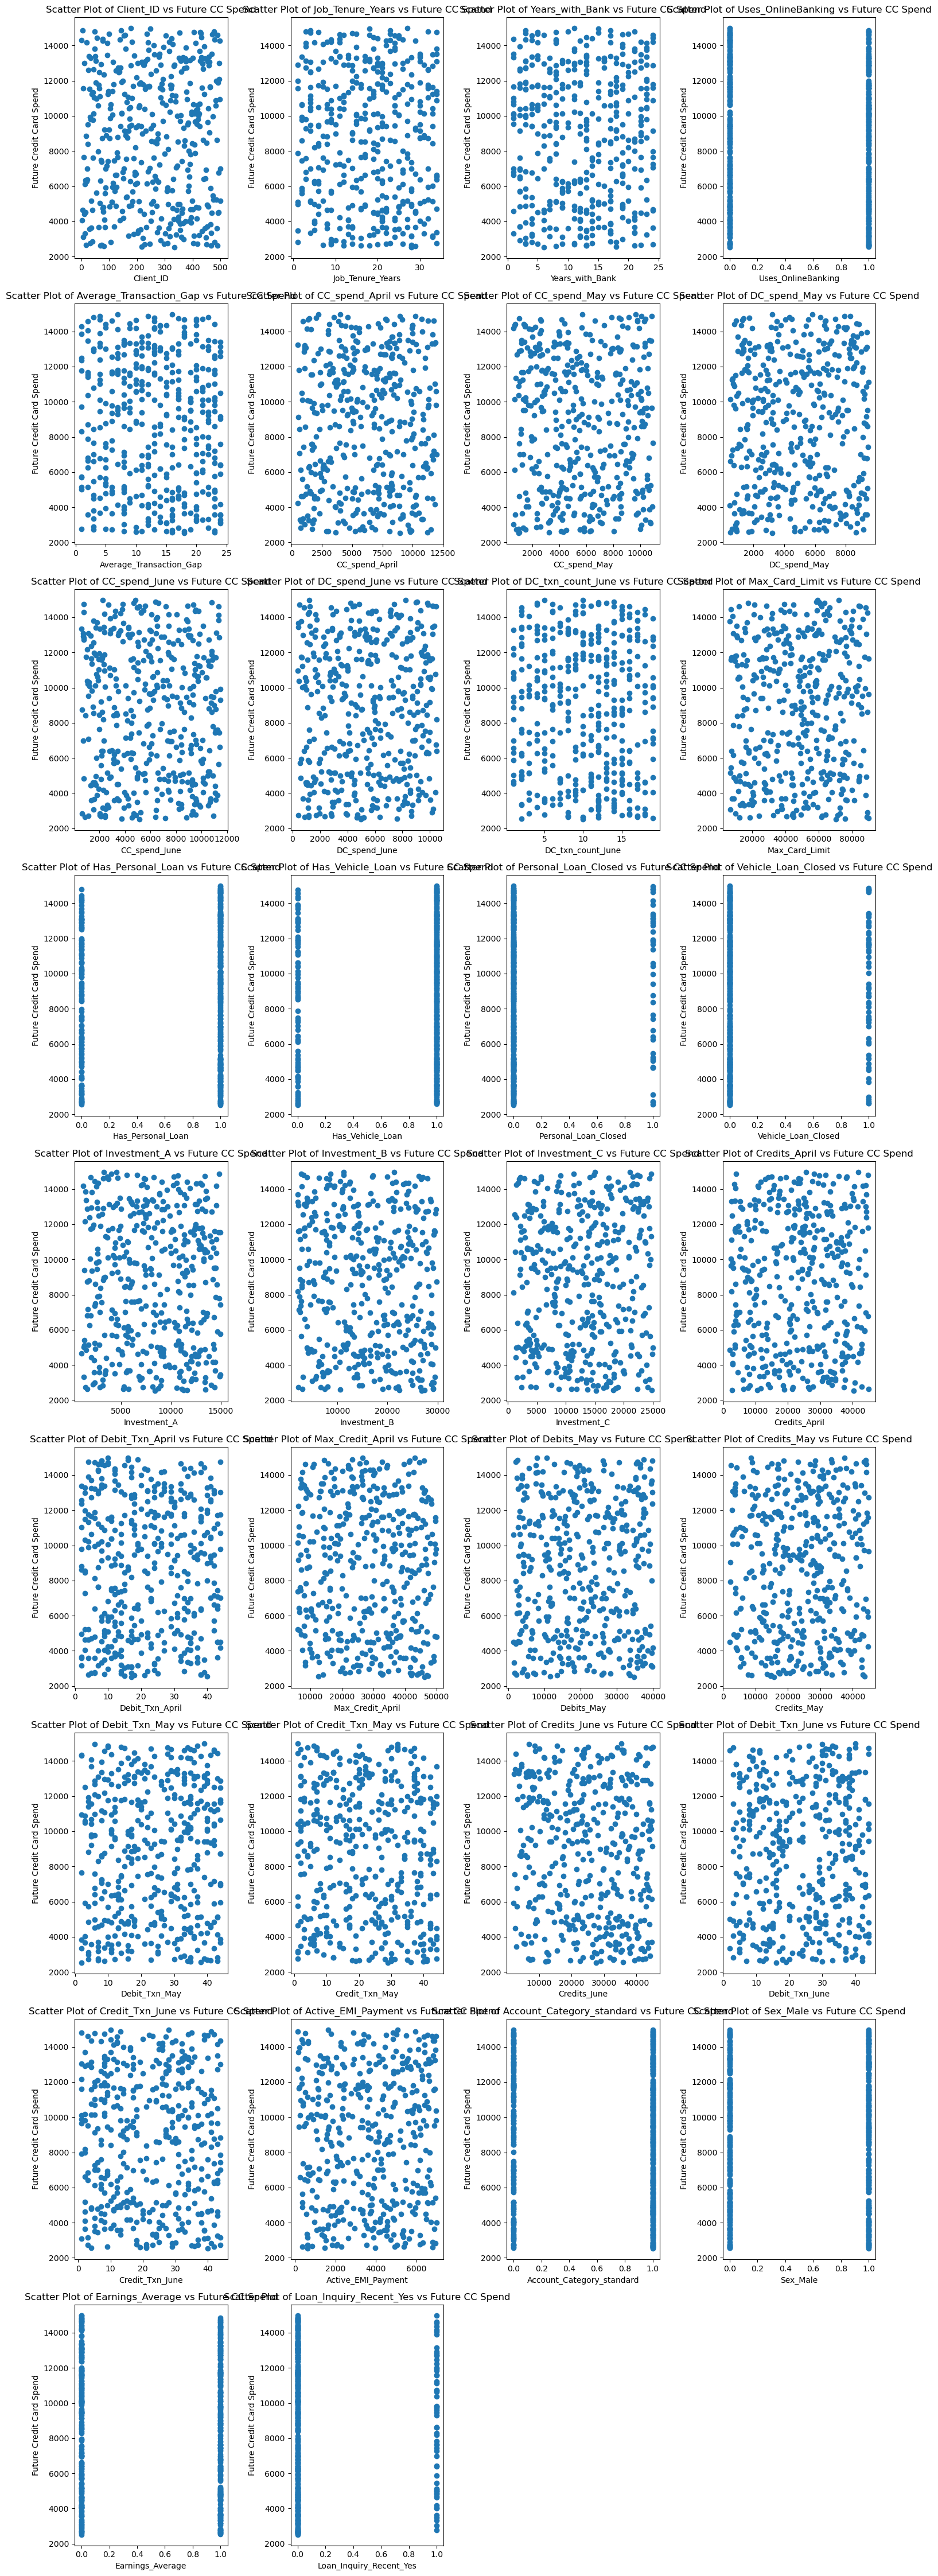

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Here we assume that X is our input features DataFrame and Y is your target variable
features_to_plot = X.columns  # Get feature names from X
num_features = len(features_to_plot)

# Here we are calculating the number of rows and columns for subplots
num_cols = 4
num_rows = np.ceil(num_features / num_cols).astype(int)

# And setting up the plotting area
plt.figure(figsize=(15, 5 * num_rows))

# Looping through features to create the scatter plots
for i, feature in enumerate(features_to_plot):
    plt.subplot(num_rows, num_cols, i + 1) 
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('Future Credit Card Spend')
    plt.title(f'Scatter Plot of {feature} vs Future CC Spend')

plt.tight_layout()  # Adjust layout
plt.show()

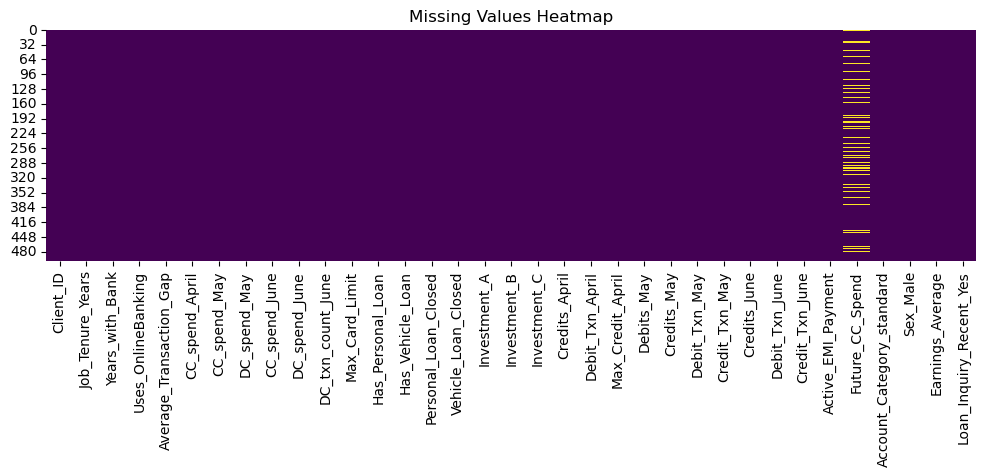

In [12]:
# Finally we will visualize the missing values.

plt.figure(figsize=(12, 3))
sns.heatmap(final_data_dropped.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Model Selection

**Now we are tasked with selecting the best model that works well with regression problems.**

**We can choose between:**

**1.Linear Regression**

**2.Decision Tree Regressor**

**3.Random Forest Regressor**

**4.XGBoost Regressor**


**We will use Random Forest Regressor**

**Q-WHY RANDOM FOREST REGRESSOR?**

**We chose Random Forest Regressor for this problem because it is effective for regression tasks, can absorb to overfitting, and can handle large datasets with multiple features.**

**Q-WHY ARE WE USING RANDOM FOREST REGRESSOR AND NOT RANDOM FOREST CLASSIFIER?**

**Because of the nature of the problem,**

**Random Forest Regressor is used for regression tasks, where the goal is to predict a continuous numerical value. In this project, we are predicting the average purchase amount for `Future CC Spend`, which is a continuous numeric value (e.g., 1000 dollars, 5000 dollars, etc.).**

**Random Forest Classifier is used for classification tasks, where the goal is to predict a category or class label (e.g., whether a transaction is fraudulent or not, or predicting if a customer will churn or not). In classification problems, the target variable is discrete (e.g., Yes/No, 0/1, High/Low, etc.).**


**Here The target variable is `Future CC Spend`, which represents a numeric value (continuous variable).
For predicting such continuous outputs, we need a regression model, and Random Forest Regressor is designed to handle regression tasks effectively.**

## Model Training

**Now we will Separate the dataset into two parts:**

**Training Set: Rows where the `Future_CC_Spend` is not missing (this will be used to train the model).**

**Test Set: Rows where the `Future_CC_Spend` is missing (this is where we will predict the missing values).**

#### SPLIT THE MODEL

In [13]:
# First we will have to separate the dataset into two parts: with and without missing target values
train_data = final_data_dropped[final_data_dropped['Future_CC_Spend'].notna()]
test_data = final_data_dropped[final_data_dropped['Future_CC_Spend'].isna()]

# Then we will separate features and target for training data
X_train = train_data.drop('Future_CC_Spend', axis=1)
Y_train = train_data['Future_CC_Spend']

# And we will also assign Features for the test data (with missing target values)
X_test = test_data.drop('Future_CC_Spend', axis=1)

#### TRAIN THE MODEL

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Training the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

#### VALIDATE THE MODEL

In [15]:
# Predicting missing values for Future_CC_Spend
predictions = model.predict(X_test)

# Adding the predictions to the test data DataFrame
test_data['Future_CC_Spend'] = predictions

C:\Users\HP\AppData\Local\Temp\ipykernel_3972\1500729630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Future_CC_Spend'] = predictions


#### COMBINING THE TEST & TRAIN DATA 

In [16]:
# Combining the original train data and the test data with predictions
final_predictions = pd.concat([train_data, test_data], ignore_index=True)

# Displaying the final predictions DataFrame
print(final_predictions.head())

   Client_ID  Job_Tenure_Years  Years_with_Bank  Uses_OnlineBanking  \
0          1                23                4                   0   
1          3                13               12                   1   
2          4                 8               13                   0   
3          5                23                3                   0   
4          6                 1               22                   1   

   Average_Transaction_Gap  CC_spend_April  CC_spend_May  DC_spend_May  \
0                       14     4434.237640   8691.681587   5402.427022   
1                       18    10055.915467  10883.941630   8387.519584   
2                       17     1878.747575   5625.613589   2256.350893   
3                        4     8951.647245  10863.717832   7920.827946   
4                       23     6611.731513   8447.521357   5474.967090   

   CC_spend_June  DC_spend_June  ...  Credit_Txn_May  Credits_June  \
0    5260.062916    7084.427003  ...               9  2809

## Why not calculating the errors?

#### CALCULATE MAE,MSE,RMSE AND RMPSE

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Here we have created a Function to calculate and display metrics

def display_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Calculating an unique metric, RMSPE
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100 


    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"RMSPE: {rmspe:.2f}%")
    print("\n")


# Making predictions on the training data
y_train_pred = model.predict(X_train)

# Displaying metrics
display_metrics(Y_train, y_train_pred)

MAE: 1238.98
MSE: 2046891.88
RMSE: 1430.70
R² Score: 0.85
RMSPE: 29.07%




**As we can see the R-Squared value of our model is 0.85,means**

**The Explained Variance:** 85% of the variance in the target variable is explained by the model. Which means the model’s predictions are very close to the actual values.

**The Unexplained Variance:** 15% of the variance in the target variable remains unexplained by the model.

**Consideration:** While the high R² indicates the model's predictions are closely aligned with the actual values, it doesn't always mean that our model is perfect. If the data has outliers or is overfitted, R² could give a falsely high impression of accuracy. 

**1.1234.59 is the Mean Absolute Error (MAE).**

The average absolute difference between the expected and actual values is represented by the MAE. A lower number corresponds to higher forecasting accuracy. In our instance, the model has a mean error of about 1234.59  units, which can be considered relatively small as our target variables are much higher.

**2.2023653.42 is the Mean Squared Error (MSE).**

The MSE reflects the average of the squared differences between the predicted and actual values. The high value of MSE suggests that the predictions deviate from the true values, and the large squared differences can point to some larger errors in predictions.

**Consideration:** The MSE can be heavily influenced by outliers because it squares the error values, so larger errors have a greater impact,and as it seems our dataset has outliers.

**3.Root Mean Squared Error (RMSE): 1422.55**

The RMSE is the square root of the MSE and is in the same units as the target variable. It gives you a sense of how much error Wwe can expect in predictions. An RMSE of 1422.55 indicates the magnitude of prediction error in the model.

**4.Root Means Square Percentage Error(RMSPE):**

RMSPE (Root Mean Squared Percentage Error) is a metric used to measure the accuracy of a model's predictions. It expresses the error as a percentage of the actual values, making it easier to interpret in terms of relative performance.

**Consideration:** It can be skewed by very small actual values. If any of the actual values are close to zero, the percentage error can become disproportionately large.


## True vs Predicted Values

**Now we will be creating a plot that can visualize the True vs Predicted value of out model.**

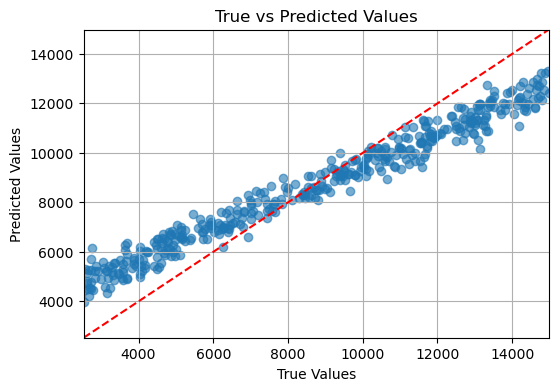

In [18]:
import matplotlib.pyplot as plt

# Creating a function for the plot

def plot_true_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')  # 45-degree line
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.xlim(y_true.min(), y_true.max())
    plt.ylim(y_true.min(), y_true.max())
    plt.grid()
    plt.show()

# Plot true vs predicted for the training data before tuning
plot_true_vs_predicted(Y_train, y_train_pred, 'True vs Predicted Values')

## Prediction of Missing Values

**Once we are satisfied with the model’s performance on the validation set, we will use the trained model to predict the missing values in the test set.**

In [19]:
# Creating a DataFrame to show the Client_ID and predicted Future_CC_Spend for the missing values

predicted_values_df = test_data[['Client_ID']].copy()
predicted_values_df['Predicted_Future_CC_Spend'] = predictions

# Displaying the DataFrame with predicted values

print(predicted_values_df)


     Client_ID  Predicted_Future_CC_Spend
1            2                7893.381092
7            8                8288.461763
9           10                9348.382233
25          26                7774.013925
27          28                7965.574324
..         ...                        ...
473        474               10465.229556
476        477                7608.172593
479        480                8216.400947
480        481                8427.307146
494        495                7164.344265

[75 rows x 2 columns]


## Exporting the Results

In [20]:
#The last step,here we will save the results in a csv file and it's done!

predicted_values_df.to_csv('Predicted_Future_CC_Spend.csv', index=False)

## Key Concepts

#### WHAT IS RMSPE?

RMSPE measures the prediction error in terms of percentages, giving an idea of how far off the predictions are in relative terms,this is a metric used to evaluate the accuracy of a model's predictions, especially in regression problems. It measures the percentage difference between the predicted and actual values, making it particularly useful when the scale of the data varies widely.

**As we can see the RMSPE(Root Mean Square Percentage Error) is high with a value of 153.80%,this means that the model's predictions are, on average, more than 1.5 times the actual values, indicating a poor fit.**







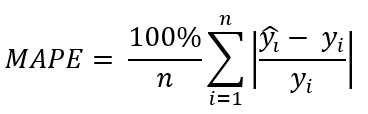

Now there can be several reasons for this,

**Missing Data:**

Handling missing values poorly can distort model performance. If missing values are not properly imputed or handled, the model may make inaccurate predictions, leading to high errors.
If the pattern of missing data is significant (e.g., non-random), this can affect the model's ability to learn from the data.

**Data quality:**

If the dataset contains noise, outliers, or unbalanced features, the model may struggle to capture meaningful relationships, resulting in large errors.

**Feature engineering:**

Poorly chosen features or lack of relevant information could cause the model to perform poorly, contributing to a high RMSPE.

**Model limitations:**

Some algorithms, like Random Forests, may not handle noisy or complex data well without hyperparameter tuning.
The default settings of a Random Forest might not generalize well to your validation set, leading to poor prediction accuracy.

#### HOW TO IMPROVE MODEL PERFORMANCE TO REDUCE RMSPE?

There are several ways to improve the model performance for this,

**Let's Handle the missing data:**

***Imputation:*** Replace missing values using strategies like mean/median imputation, forward/backward filling, or predictive imputation (e.g., using KNN).
Dropping missing rows: If the missing data is random, consider dropping those rows, though this reduces data size.

***Also can use more advanced models:***

We can Try algorithms like XGBoost, LightGBM, or Gradient Boosting, which may handle missing data better and provide more accurate predictions.

***Hyperparameter tuning:***

Tuning the hyperparameters of the model (e.g., n_estimators, max_depth, min_samples_split) to help improve performance.

***Feature engineering:***

We can Create new features or remove irrelevant ones to help the model learn better patterns from the data.

***Cross-validation:***

We can also Use techniques like k-fold cross-validation to evaluate the model performance on multiple validation sets instead of a single one, giving you a more reliable estimate of its performance.

# Final Evaluation

### Summary of Metrics:
- **Target Column (`Future_CC_Spend`)**:
  - Maximum Value: 14,950.31
  - Minimum Value: 1,002.59
  - Average Value: 8,314.19

### Evaluation of Metrics:

1. **Mean Absolute Error (MAE: 1238.98)**:
   - The MAE represents the average absolute error in our predictions. Given that the average value of `Future_CC_Spend` is approximately 8,314.19, the MAE of 1,238.98 constitutes about 14.9% of the average value. This is a reasonable error level, indicating that the model provides reasonably accurate predictions relative to the average value.

2. **Mean Squared Error (MSE: 2,046,891.88)**:
   - The MSE penalizes larger errors more heavily due to squaring the differences. Given the maximum value of 14,950.31, a high MSE may suggest that there are some significant outliers or that the model struggles with certain ranges of predictions. Comparing it to the range of your target, the MSE seems quite high, indicating that there may be room for improvement.

3. **Root Mean Squared Error (RMSE: 1,430.70)**:
   - RMSE is in the same unit as the target variable and provides an interpretable average error magnitude. The RMSE represents approximately 17.2% of the average value of `Future_CC_Spend` (1,430.70 / 8,314.19), which is moderately acceptable but suggests that the model could be improved.

4. **R² Score (0.85)**:
   - An R² score of 0.85 indicates that the model explains 85% of the variance in `Future_CC_Spend`. This is considered a strong performance, suggesting that the model captures a significant amount of the underlying trend.

### Conclusion:

- **Overall Assessment**:
  - **MAE**: This value is Reasonably acceptable, it indicates good average performance relative to the average target value.
  - **MSE**: It's High, suggests potential issues with larger prediction errors; worth investigating further.
  - **RMSE**: It's Moderate, but indicates that there are significant errors that could be reduced.
  - **R²**: Strong, indicating good explanatory power.

### Recommendations:
- **Investigate Outliers**: We can look at the errors into the data for outliers or influential points that might be driving the high MSE and RMSE.
- **Feature Engineering**: We can Consider adding or transforming features to capture more of the variance in `Future_CC_Spend`.
- **Model Improvement**: Also we can further apply hyperparameter tuning and try different algorithms may help reduce errors and improve overall performance,although the overfitting issue can still be probalamatic and in that case after tuning the errors might increase.

In summary, while our metrics show a strong model performance in terms of variance explanation (R²), there are still areas for improvement regarding the error metrics.